In [1]:
import sys
sys.path.append('f:/seismic/code/core')
sys.path.append('/seismic/code/core')
sys.path.append('/kaggle/input/my-seis-library/')
import kaggle_support as kgs
import importlib
import numpy as np
import matplotlib.pyplot as plt
import glob
import copy
import os
import seis_test
import seis_invert
import seis_prior
#import seis_nn
import cupy as cp
import seis_diagnostics
import seis_forward
import seis_forward2

F:/seismic/models/brendan/*.pth
Loading:  F:/seismic/models/brendan\unet2d_caformer_seed3_epochbest.pt
n_models: 1


In [2]:
data=kgs.load_all_train_data()
#d = data[11]
#print(d.family)

CurveFault_A


In [3]:
# importlib.reload(seis_prior)
# importlib.reload(seis_diagnostics)
# importlib.reload(seis_invert)
# kgs.profiling=False
# kgs.debugging_mode = 0
# seis_forward2.profiling=False
# seis_forward2.reset_profile()

# model = seis_invert.InversionModel()
# model.state = 1
# model.method = 'L-BFGS-B'
# model.maxiter = 5000
# model.prior = seis_prior.SquaredExponential()


# model.prior.basis_functions();
# w = cp.linalg.eigvalsh(model.prior.P)   
# plt.figure()
# plt.semilogy(cp.asnumpy(cp.abs(w)))

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.00it/s]


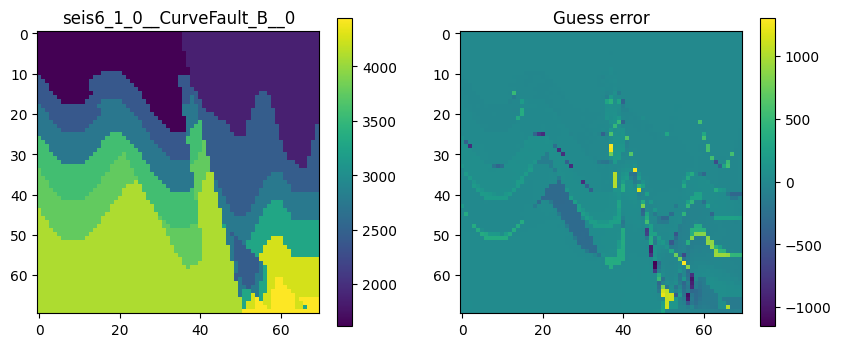

diag 3.250623900849397e-05
1e-07
5.010452569656546e-06
1e-07
5.010453356556633e-06
1e-07
5.010460768186191e-06
1e-07
5.010562237754875e-06
1e-07
5.0127497407320405e-06
1e-07
5.018827796925977e-06
1e-07
5.051568963434065e-06
1e-07
5.084732013461271e-06
1e-07
5.0928296235650135e-06
1e-07
5.130155369605695e-06
1e-07
5.154830552785521e-06
1e-07
5.223090046450562e-06
1e-08
5.223090046450563e-07
1e-08
5.223089127514442e-07
1e-08
5.223080872473884e-07
1e-08
5.223000379642656e-07
1e-08
5.222683495264813e-07
1e-08
5.222514294613396e-07
1e-08
5.222488259351362e-07
1e-08
5.222528567266284e-07
1e-08
5.222926020360303e-07
1e-08
5.225447511390739e-07
1e-08
5.236667366714519e-07
1e-08
5.250013369575051e-07
1e-09
5.2500133695750513e-08
1e-09
5.2500144266546253e-08
1e-09
5.250023983430227e-08
1e-09
5.250122130053595e-08
1e-09
5.250922609556139e-08
1e-09
5.2519322592394235e-08
1e-09
5.253022683652428e-08
1e-09
5.2716606221699513e-08
1e-09
5.286836414292943e-08
1e-09
5.277020736699072e-08
1e-09
5.2785281

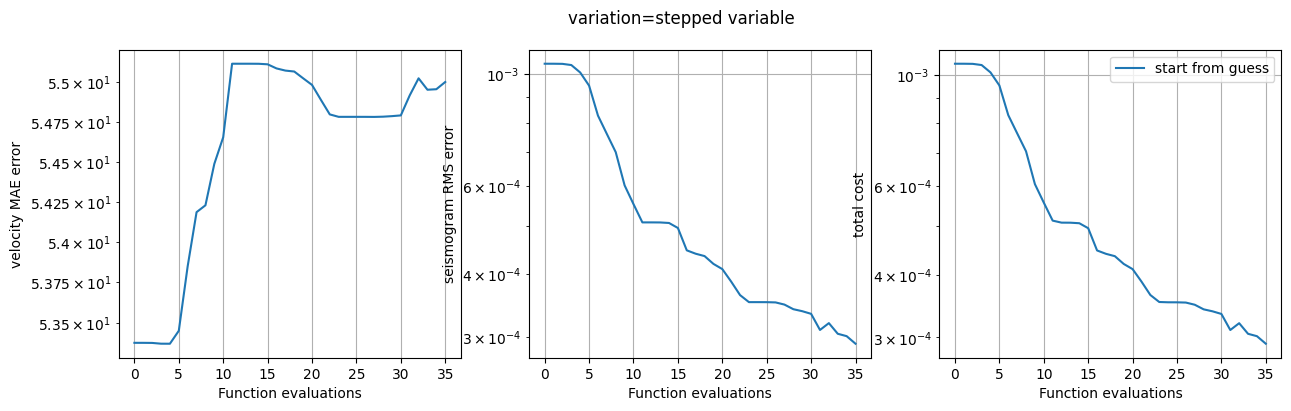

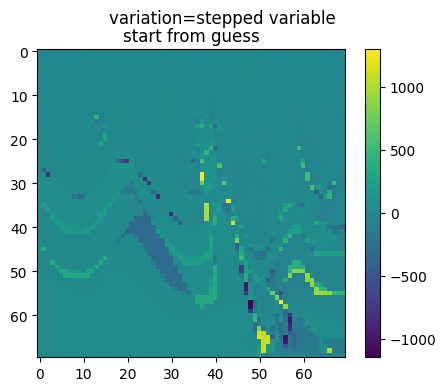

diag 3.250623900849397e-05
1e-08
5.010452569656546e-07
1e-08
5.010453374400621e-07
1e-08
5.010460946623922e-07
1e-08
5.010564021753363e-07
1e-08
5.012767124023862e-07
1e-08
5.018871455255794e-07
1e-08
5.051716751392714e-07
1e-08
5.084976932909524e-07
1e-08
5.093104392476692e-07
1e-08
5.130546357784772e-07
1e-08
5.155305998951984e-07
1e-08
5.223825083501771e-07
1e-08
5.223825083501771e-07
1e-08
5.223824161684913e-07
1e-08
5.223815880861046e-07
1e-08
5.223735123683432e-07
1e-08
5.223412427120508e-07
1e-08
5.223239818266539e-07
1e-08
5.223212314467474e-07
1e-08
5.223246795914691e-07
1e-08
5.223638197234751e-07
1e-08
5.226178060179627e-07
1e-08
5.237274889445796e-07
1e-08
5.250535930771145e-07
1e-08
5.250535930771145e-07
1e-08
5.250537015556217e-07
1e-08
5.250546807273982e-07
1e-08
5.250646707770116e-07
1e-08
5.251447838273528e-07
1e-08
5.252451857991109e-07
1e-08
5.253529650511006e-07
1e-08
5.273464184282222e-07
1e-08
5.288657296753844e-07
1e-08
5.279330083503472e-07
1e-08
5.2795549794986

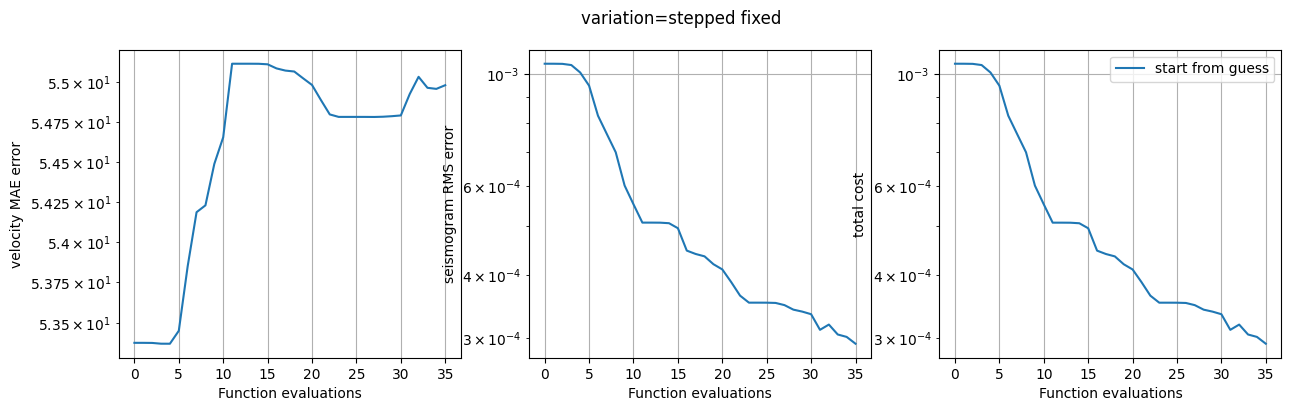

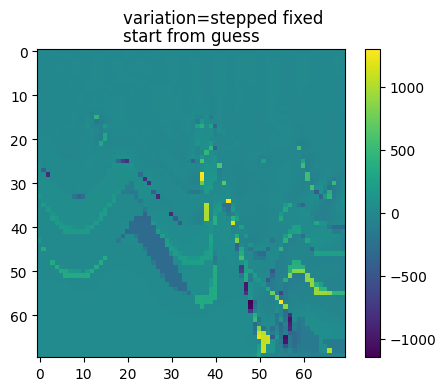

diag 3.250623900849397e-05
1e-08
5.010452569656546e-07
1e-08
5.010453374400621e-07
1e-08
5.010460946623922e-07
1e-08
5.010564021753363e-07
1e-08
5.012767124023862e-07
1e-08
5.018871455255794e-07
1e-08
5.051716751392714e-07
1e-08
5.084976932909524e-07
1e-08
5.093104392476692e-07
1e-08
5.130546357784772e-07
1e-08
5.155305998951984e-07
1e-08
5.223825083501771e-07
1e-08
5.240706153612355e-07
1e-08
5.229824217922189e-07
1e-08
5.239747726552785e-07
1e-08
5.27201507697294e-07
1e-08
5.330111972217091e-07
1e-08
5.330392090581997e-07
1e-08
5.335774704756829e-07
1e-08
5.348968401112571e-07
1e-08
5.379365983112956e-07
1e-08
5.433389086933634e-07
1e-08
5.400456678329436e-07
1e-08
5.433946795807317e-07
1e-08
5.454938263208281e-07
1e-08
5.478005097362886e-07
1e-08
5.498495554818303e-07
1e-08
5.512484602502273e-07
1e-08
5.528769221113336e-07
1e-08
5.543690751083684e-07
1e-08
5.579961666352664e-07
1e-08
5.634139853673683e-07
1e-08
5.628788012436406e-07
1e-08
5.6296546999313e-07
1e-08
5.646278178400705e

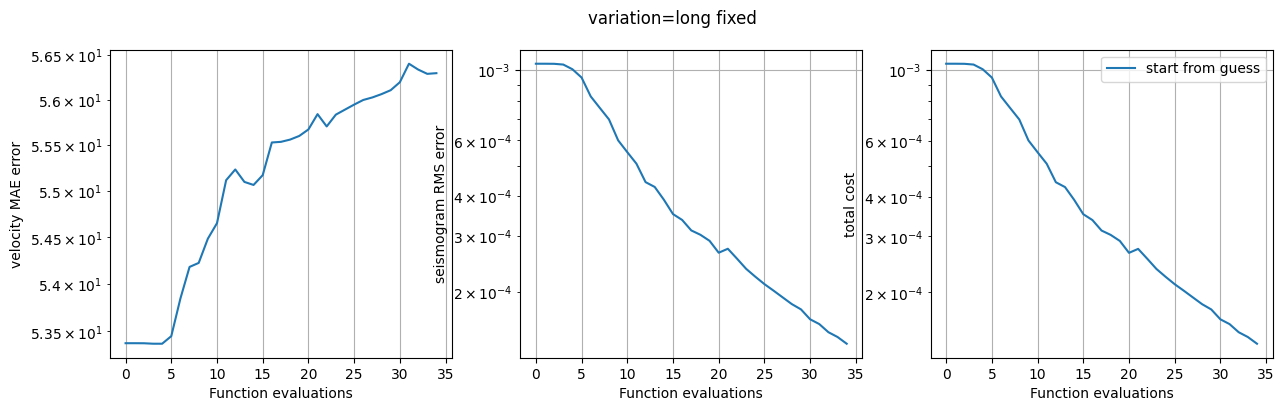

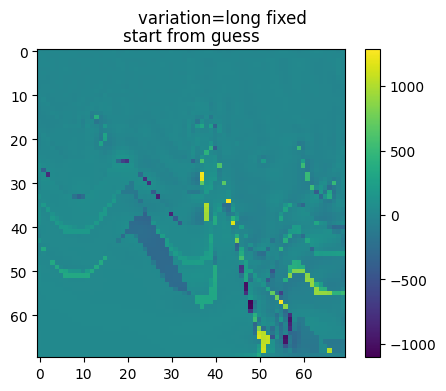

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.31it/s]


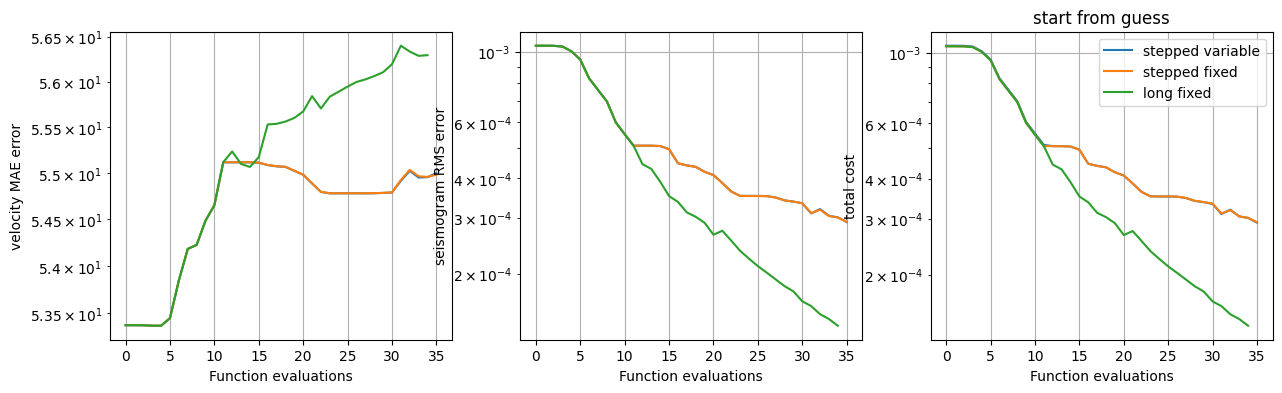

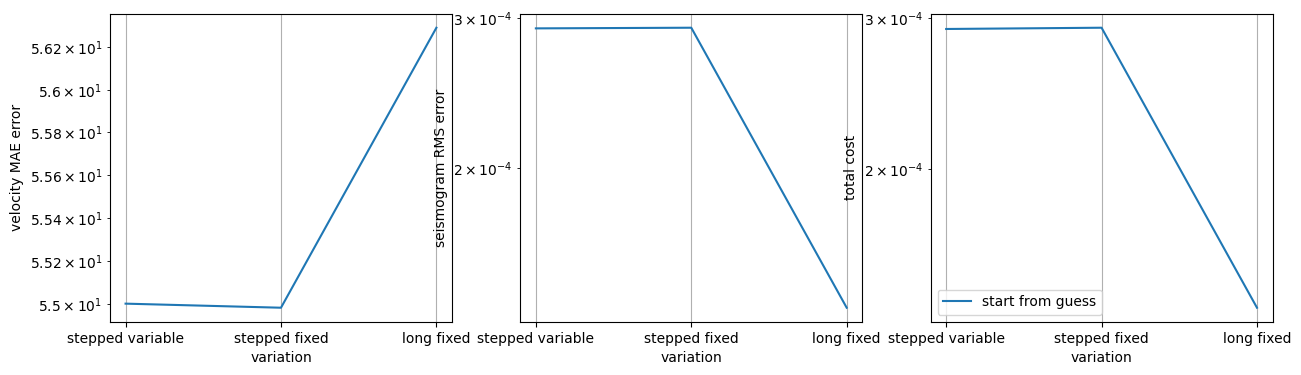

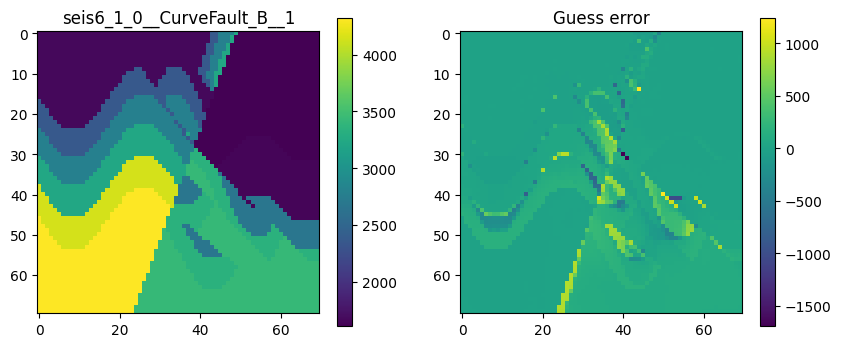

diag 4.576705036178085e-05
1e-07
4.856450043751031e-06
1e-07
4.856448878724384e-06
1e-07
4.856439111022753e-06
1e-07
4.856381915904885e-06
1e-07
4.856992593718486e-06
1e-07
4.857899992287641e-06
1e-07
4.870420134477625e-06
1e-07
4.8907600308912505e-06
1e-07
4.9260453148444425e-06
1e-07
4.9192001293500256e-06
1e-07
4.921006544662627e-06
1e-07
4.933413551083784e-06
1e-08
4.933413551083785e-07
1e-08
4.933414891465437e-07
1e-08
4.933426999283382e-07
1e-08
4.933551638022036e-07
1e-08
4.936245486371931e-07
1e-08
4.940268853986184e-07
1e-08
4.948491203714437e-07
1e-08
4.972081955526198e-07
1e-08
5.028539493563167e-07
1e-08
5.069633999080682e-07
1e-08
5.102642258121527e-07
1e-08
5.126223478531488e-07
1e-09
5.1262234785314885e-08
1e-09
5.126221239156646e-08
1e-09
5.126201121167993e-08
1e-09
5.1260048353730434e-08
1e-09
5.1246866631425236e-08
1e-09
5.1236319321233164e-08
1e-09
5.123261131842223e-08
1e-09
5.120814525246061e-08
1e-09
5.120336428973358e-08
1e-09
5.124928098776026e-08
1e-09
5.129411

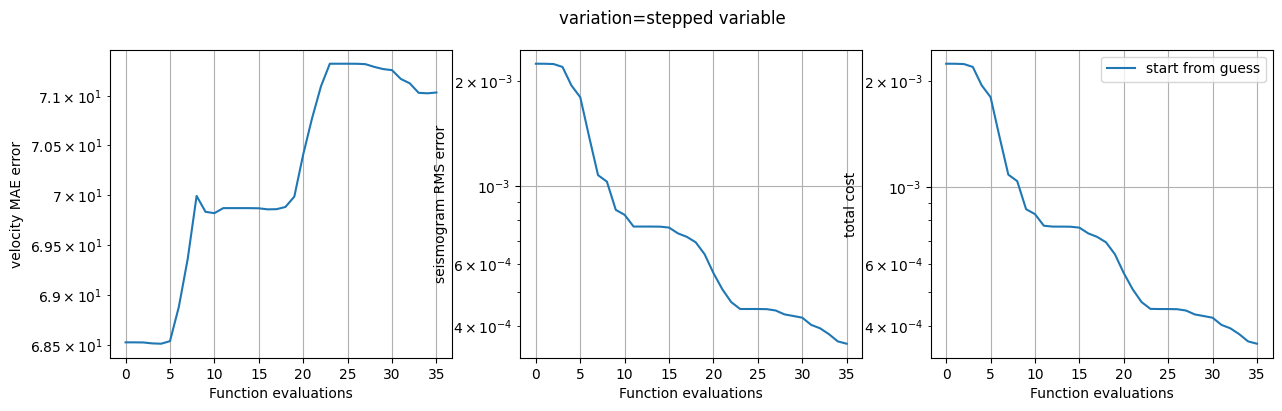

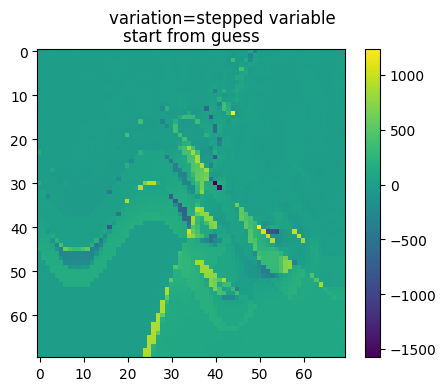

diag 4.576705036178085e-05
1e-08
4.856450043751031e-07
1e-08
4.856448883017942e-07
1e-08
4.856439153956857e-07
1e-08
4.856382345492311e-07
1e-08
4.856996800685228e-07
1e-08
4.857910731347709e-07
1e-08
4.87045806109207e-07
1e-08
4.890835011229185e-07
1e-08
4.926192013583034e-07
1e-08
4.919340110197901e-07
1e-08
4.921157393331726e-07
1e-08
4.933608941151895e-07
1e-08
4.933608941151895e-07
1e-08
4.933610278526393e-07
1e-08
4.933622359294563e-07
1e-08
4.933746739980628e-07
1e-08
4.936436801486171e-07
1e-08
4.94045445743756e-07
1e-08
4.94866324776474e-07
1e-08
4.972237153224224e-07
1e-08
5.028675488908804e-07
1e-08
5.069806964267289e-07
1e-08
5.102820297650054e-07
1e-08
5.126330190760534e-07
1e-08
5.126330190760534e-07
1e-08
5.12632794681465e-07
1e-08
5.126307787921462e-07
1e-08
5.126111064149217e-07
1e-08
5.124788140923201e-07
1e-08
5.123727883567338e-07
1e-08
5.123354386619346e-07
1e-08
5.120901051664299e-07
1e-08
5.120419080832004e-07
1e-08
5.124976125727726e-07
1e-08
5.129482838424388e-

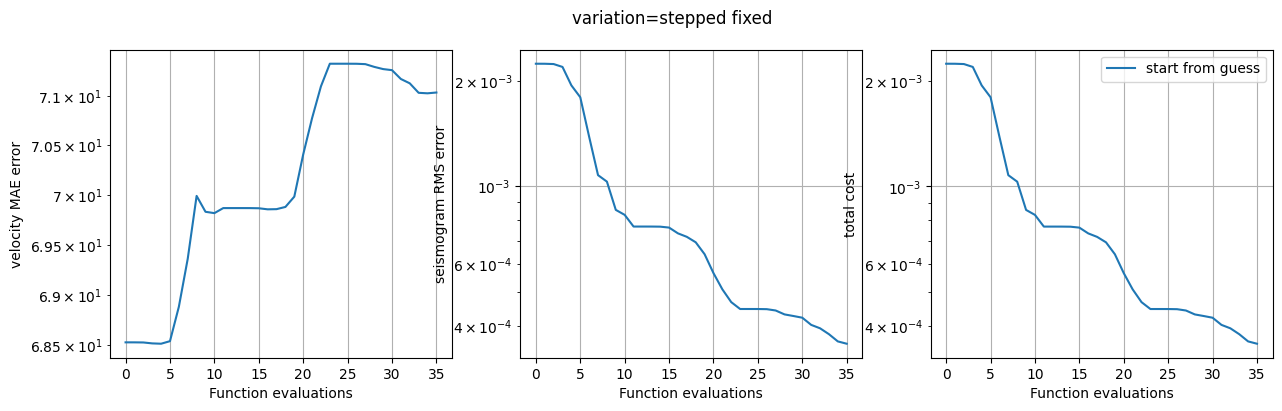

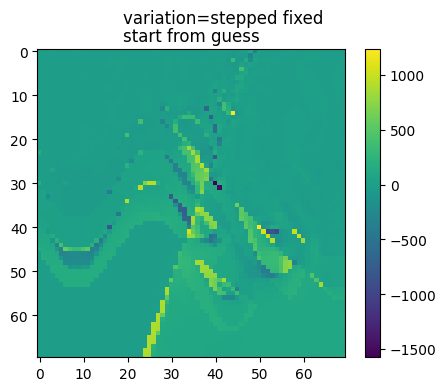

diag 4.576705036178085e-05
1e-08
4.856450043751031e-07
1e-08
4.856448883017942e-07
1e-08
4.856439153956857e-07
1e-08
4.856382345492311e-07
1e-08
4.856996800685228e-07
1e-08
4.857910731347709e-07
1e-08
4.87045806109207e-07
1e-08
4.890835011229185e-07
1e-08
4.926192013583034e-07
1e-08
4.919340110197901e-07
1e-08
4.921157393331726e-07
1e-08
4.933608941151895e-07
1e-08
4.952380444972924e-07
1e-08
5.001543351599055e-07
1e-08
5.052940175850311e-07
1e-08
5.042594980470248e-07
1e-08
5.04704678143711e-07
1e-08
5.073001935643218e-07
1e-08
5.123405520362725e-07
1e-08
5.143913239379696e-07
1e-08
5.152814562802176e-07
1e-08
5.169982775620441e-07
1e-08
5.194776952583098e-07
1e-08
5.245925713745384e-07
1e-08
5.363749672360749e-07
1e-08
5.276194866427598e-07
1e-08
5.312173756006247e-07
1e-08
5.32536847799375e-07
1e-08
5.342650701719829e-07
1e-08
5.371734540526326e-07
1e-08
5.440453106218623e-07
1e-08
5.428689516401593e-07
1e-08
5.427233368063837e-07
1e-08
5.434903103562789e-07
1e-08
5.456280198582902e

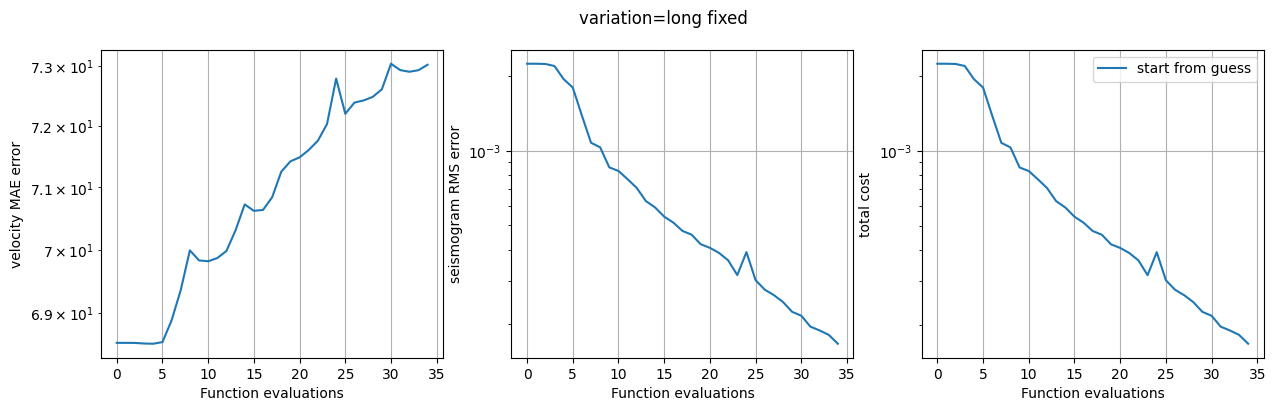

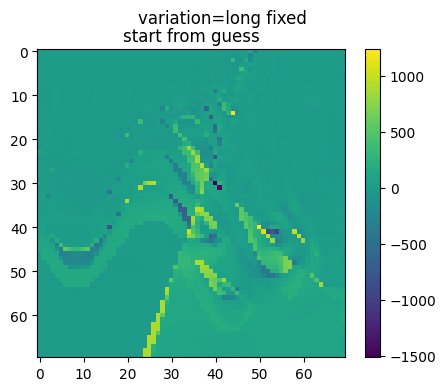

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.23it/s]


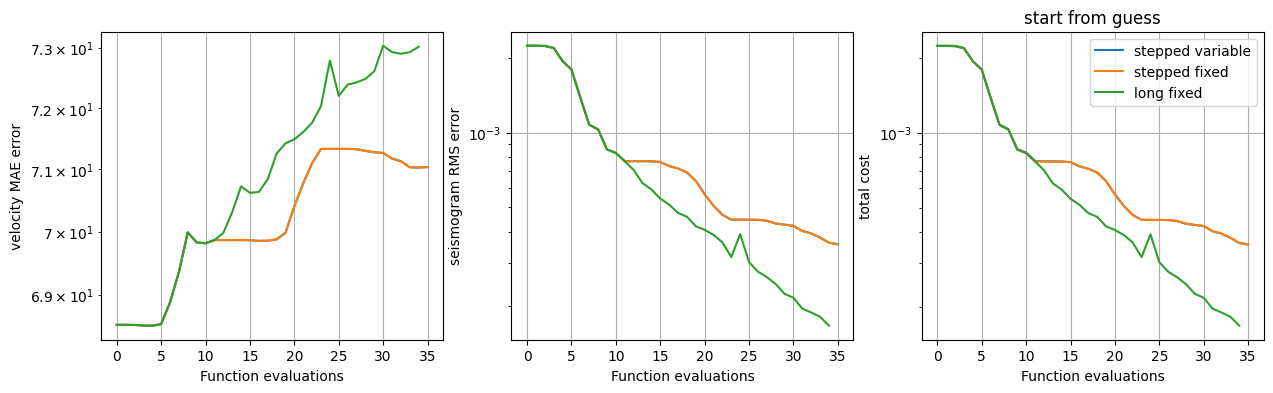

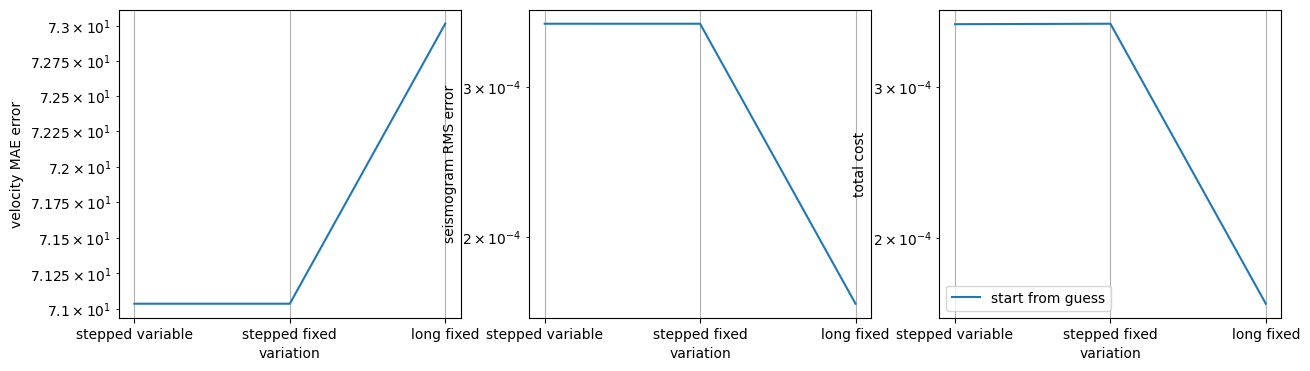

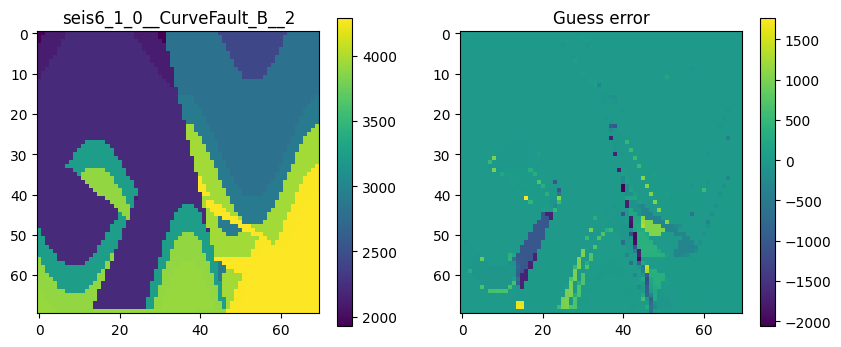

diag 3.7414936137285974e-05
1e-07
5.917872782928222e-06
1e-07
5.917872816175053e-06
1e-07
5.917873298614838e-06
1e-07
5.917892781687114e-06
1e-07
5.919028590364238e-06
1e-07
5.925769644125851e-06
1e-07
5.950474019610014e-06
1e-07
6.027601121619665e-06
1e-07
6.183982122598652e-06
1e-07
6.510004253280144e-06
1e-07
6.293868576717334e-06
1e-07
6.391303928320395e-06
1e-08
6.391303928320396e-07
1e-08
6.391303941850578e-07
1e-08
6.391304066918445e-07
1e-08
6.39130565534101e-07


In [ ]:
importlib.reload(seis_prior)
importlib.reload(seis_diagnostics)
importlib.reload(seis_invert)
importlib.reload(seis_forward)
kgs.profiling=False
seis_invert.profiling=False
kgs.debugging_mode = 0
seis_forward2.profiling=False
seis_forward2.reset_profile()

# transform back on, history size to infinite, maxiter down
model = seis_invert.InversionModel()
model.history_size = 10000
model.prior = seis_prior.TotalVariation()
model.prior.λ = 10**-8
model.show_convergence=True
model.iter_list = [1000]

do_which_list = [False,False,True]

def param_func(model,value):
    match value:
        case 'long fixed':
            model.iter_list = [3000]
            model.lambda_list = [1e-8]
        case 'stepped fixed':
            model.iter_list = [1000,1000,1000]
            model.lambda_list = [1e-8,1e-8,1e-8]
        case 'stepped variable':
            model.iter_list = [1000,1000,1000]
            model.lambda_list = [1e-7,1e-8,1e-9]
        case _:
            raise 'stop'
    #model.iter_list = [ii//100 for ii in model.iter_list]
    return model
    
param_values = ['stepped variable',  'stepped fixed', 'long fixed']
param_name = "variation"


for d in data[1000:]:
    results = seis_diagnostics.do_diagnostics_run(d, model, do_which_list, param_func, param_values, param_name, help_fac=0.)